import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [167]:
path="C:/Users/Lenovo/Downloads/insurance.csv"

In [168]:
df= pd.read_csv(path)

In [169]:
df.head(250)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
245,54,male,30.020,0,no,northwest,24476.47851
246,60,female,38.060,0,no,southeast,12648.70340
247,24,male,35.860,0,no,southeast,1986.93340
248,19,male,20.900,1,no,southwest,1832.09400


In [170]:
df.shape

(1338, 7)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [172]:
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [173]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [174]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [175]:
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

X=df.iloc[:, 0:6]
x

array([[19, 'female', 27.9, 0],
       [18, 'male', 33.77, 1],
       [28, 'male', 33.0, 3],
       ...,
       [18, 'female', 36.85, 0],
       [21, 'female', 25.8, 0],
       [61, 'female', 29.07, 0]], dtype=object)

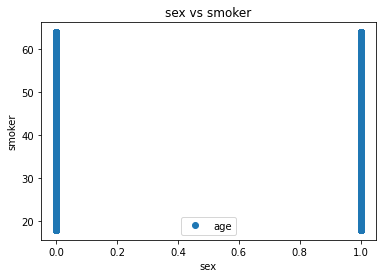

In [176]:
df.plot(x='sex', y='age', style='o')
plt.title('sex vs smoker')
plt.xlabel('sex')
plt.ylabel('smoker')
plt.show()


In [177]:
df.head(250)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
245,54,1,30.020,0,0,1,24476.47851
246,60,0,38.060,0,0,2,12648.70340
247,24,1,35.860,0,0,2,1986.93340
248,19,1,20.900,1,0,3,1832.09400


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [179]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
X_train

,age,sex,bmi,children,smoker,region
1181,24,0,29.925,0,0,1
149,19,1,28.400,1,0,3
765,57,0,31.825,0,0,1
907,44,0,32.340,1,0,2
635,64,1,38.190,0,0,0
...,...,...,...,...,...,...
535,38,1,28.025,1,0,0
1005,29,1,31.730,2,0,1
472,19,0,29.800,0,0,3
486,54,0,21.470,3,0,1


In [180]:
print(regressor.intercept_)

-12000.253065143268


In [181]:
print(regressor.coef_)

[ 2.64658384e+02 -1.87580224e+01  3.31618545e+02  3.22261969e+02
  2.36956845e+04 -3.63257872e+02]


In [182]:
y_pred = regressor.predict(X_test)
y_pred

array([29650.47347888, 11934.24836532, 12966.9241344 , 10587.36648463,
        6737.83661331, 10454.60297144, 11539.14437546, 13679.33025381,
       12804.0474983 ,  7174.47858652, 29022.79189884,  8203.20703404,
        6119.66376222, 36938.0503331 ,  4398.63801818, 26616.38982825,
        5396.4674831 ,  1509.14926266,  2848.73275347, 11032.81763867,
       14548.21735099,  3055.26042083, 28371.88849393, 34567.19469254,
        9072.63960212,  3494.02018087, 29263.98736115,  2666.407401  ,
       10540.32279459, 11865.13560316,  8067.1561256 ,   399.80277464,
        9285.57134294, 29570.39379908,  3903.43515885, 10547.10567808,
       15063.38968037, 29740.33399519, 11535.35693935,  9660.37644414,
        7219.09708591, 31835.18501259,  2876.16653974, 11188.29152652,
       10502.92069686, 28571.03841545,  5830.25511305, 31033.36728459,
       13074.7428826 ,   509.16566853, 10242.99338812,  9344.54231514,
       14547.35763223, 11947.8319203 , 14754.48190664,  6248.19206292,
      

In [183]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 4177.813211401207
Mean Squared Error: 36922364.24639677
Root Mean Squared Error: 6076.37755956596


In [184]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1011,18767.73770,29650.473479
255,13047.33235,11934.248365
1115,10807.48630,12966.924134
969,8596.82780,10587.366485
1065,7045.49900,6737.836613
...,...,...
29,38711.00000,31473.586873
537,8825.08600,9743.662990
337,13937.66650,13484.903744
308,11944.59435,14893.055769
